In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

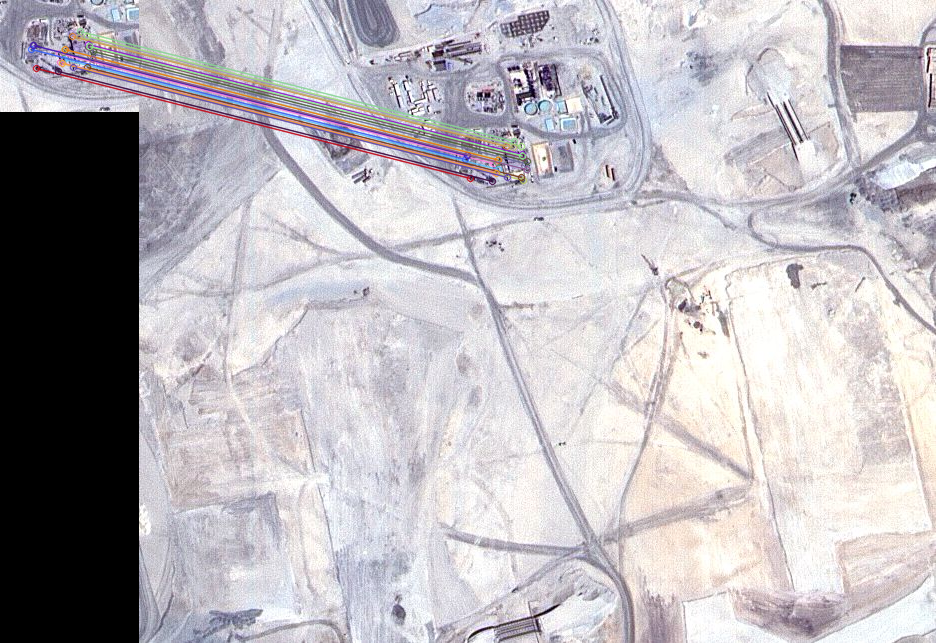

In [ ]:
# prompt: Hacer landmark pero a color

img1_color = cv.imread('/content/drive/MyDrive/Semestre 8/Visión por computador /Clase 6/landmark_ims/Ims/land0.jpg')
img2_color = cv.imread('/content/drive/MyDrive/Semestre 8/Visión por computador /Clase 6/landmark_ims/Ims/src0.jpg')

# Convert color images to grayscale for feature detection
img1 = cv.cvtColor(img1_color, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2_color, cv.COLOR_BGR2GRAY)

# Initialize the ORB detector
# You can replace this with SIFT if needed: rb = cv.SIFT_create()
rb = cv.ORB_create()

# Find keypoints and descriptors
kp1, des1 = rb.detectAndCompute(img1, None)
kp2, des2 = rb.detectAndCompute(img2, None)

# Match keypoints
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

# Draw matches on color images
img_matches = cv.drawMatchesKnn(img1_color, kp1, img2_color, kp2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
cv2_imshow(img_matches)